# Problem 1

Problem in [Hogg et.al](https://arxiv.org/pdf/1710.06068.pdf). Calculate the mean, variance skewness and kurtosis of a distribution. Here I choose the beta distribution. 

The sample mean (first moment)
$$\bar{x} = \frac{1}{N}\sum_{i=1}^{N} x_i$$

The variance (second moment) 
$$\sigma^2 = \frac{1}{N} \sum_{i=1}^{N} (x_i - \bar{x})^2$$

Skewness (third moment)
$$\alpha_3 = \frac{1}{\sigma^3} \frac{1}{N} \sum_{i=1}^{N} (x_i - \bar{x})^3$$

Kurtosis (fourth moment)
$$\alpha_4 = \frac{1}{\sigma^4} \frac{1}{N} \sum_{i=1}^{N} (x_i - \bar{x})^4$$




In [1]:
import numpy as np
import pylab as pl
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [38]:
def stat_sample(x):
    '''
    calculate the mean, variance, skewness and kurtosis of a sample
    '''
    N = len(x)
    xbar = np.mean(x)
    sigma2 = np.sum((x-xbar)**2) / N
    alpha3 = np.sum((x-xbar)**3) / (N * sigma2**(3/2))
    alpha4 = np.sum((x-xbar)**4) / (N * sigma2**2)
    return xbar, sigma2, alpha3, alpha4

In [47]:
def stat_beta(a, b):
    '''
    calculate the analytical mean, var, skewness and kurtosis of beta distribution
    '''
    mu = a / (a + b)
    var = a*b / ((a + b)**2 * (a + b + 1))
    skewness = 2 * (b-a) * np.sqrt(a+b+1) / ((a+b+2)*np.sqrt(a*b))
    kurtosis = 6 * ((a-b)**2 *(a+b+1) - a*b*(a+b+2)) / (a*b*(a+b+2)*(a+b+3)) + 3
    
    return mu, var, skewness, kurtosis
    

In [76]:
def stat_Nsample(N, a, b):
    ''' calculate for 2**N samples'''

    Xbar = []
    Sigma2 = []
    Alpha3 = [] 
    Alpha4 = []
    for ni in N:
        # sample 
        size = 2**ni
        x = np.random.beta(a, b, size)
        # calculate sample mean
        xbar, sigma2, alpha3, alpha4 = stat_sample(x)
        Xbar.append(xbar)
        Sigma2.append(sigma2)
        Alpha3.append(alpha3)
        Alpha4.append(alpha4) 
    return Xbar, Sigma2, Alpha3, Alpha4

In [102]:
def plot():
    ''' plot '''
    fig = pl.figure(figsize=(10, 8))

    ax1 = fig.add_subplot(221)
    ax1.plot(N, mu*np.ones(len(N)), label='analytic mean')
    ax1.plot(N, Xbar, label='sample mean')
    pl.xlabel('$Log_2(N)$')
    pl.ylabel('mean')
    pl.legend()

    ax2 = fig.add_subplot(222)
    ax2.plot(N, var*np.ones(len(N)), label='analytic variance')
    ax2.plot(N, Sigma2, label='sample variance')
    pl.xlabel('$Log_2(N)$')
    pl.ylabel('variance')
    pl.legend()

    ax3 = fig.add_subplot(223)
    ax3.plot(N, skewness*np.ones(len(N)), label='analytic skewness')
    ax3.plot(N, Alpha3, label='sample skewness')
    pl.xlabel('$Log_2(N)$')
    pl.ylabel('skewness')
    pl.legend()

    ax4 = fig.add_subplot(224)
    ax4.plot(N, kurtosis*np.ones(len(N)), label='analytic kurtosis')
    ax4.plot(N, Alpha4, label='sample kurtosis')
    pl.xlabel('$Log_2(N)$')
    pl.ylabel('kurtosis')
    pl.legend()

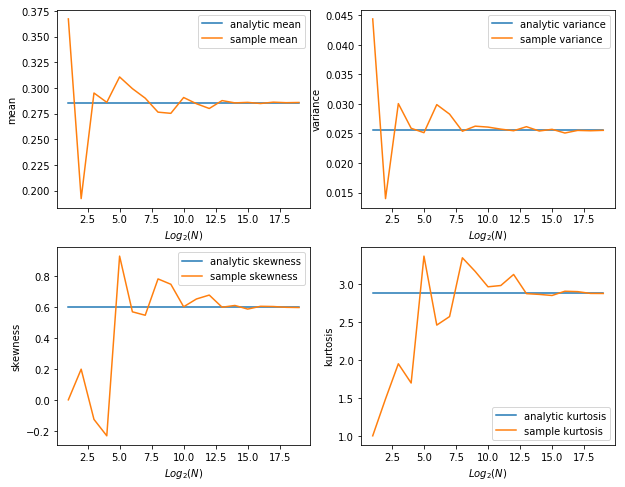

In [103]:
# I choose the beta distribution, it has two parameters
a = 2
b = 5

# calculate analytical mean
mu, var, skewness, kurtosis = stat_beta(a, b)

# calculate sample mean
N = np.arange(1, 20)
Xbar, Sigma2, Alpha3, Alpha4 = stat_Nsample(N, a, b)

# plot
plot()

##### Figure 1. The sample mean, variance skewness and kurtosis vs. the logrithm of number of sample. Those four quantities calculated from sample approach to analytic results with the increase of $N$.